In [25]:
import numpy as np
import pandas as pd
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
import geopandas as gpd

%matplotlib inline
# relative search volume factor ranging between 1 and 100 over the month of 01.2020


In [7]:
pytrends = TrendReq(hl='en-US', tz=360)
kw_list = ["coronavirus"] #Terms to be searched
timeframe='2019-12-31 2020-01-31' # timeframe for the search
#pytrends.build_payload(kw_list, cat=0, timeframe=timeframe, geo='GLOBAL', gprop='')
pytrends.build_payload(kw_list, cat=0, timeframe=timeframe, geo='', gprop='') 

In [8]:
data=pytrends.interest_over_time()
data.reset_index(inplace=True)

data.head()

,date,coronavirus,isPartial
0,2019-12-31,0,False
1,2020-01-01,0,False
2,2020-01-02,0,False
3,2020-01-03,0,False
4,2020-01-04,0,False


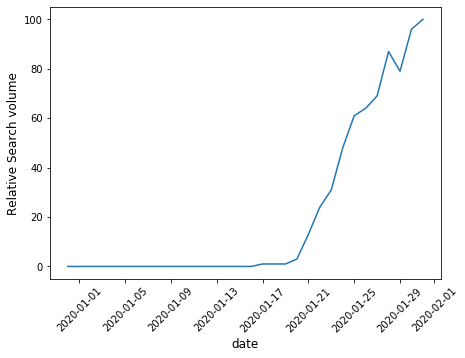

In [9]:
plt.figure(figsize=(7, 5))
plt.plot(data['date'], data['coronavirus'])
plt.xticks(rotation=45)
plt.xlabel('date', fontsize=12)
plt.ylabel('Relative Search volume', fontsize=12)
plt.savefig('graph.png', bbox_inches = "tight")
plt.show()

In [39]:
#MAPS by search:

#This dataset is composed of countour data, country name 2 and 3 letter country code 
#and search result for coronavisus by country

pd_search=gpd.read_file('europe_data/europe_shape.shp')
pd_search.head()

,GID_0,NAME_0,c_code,search,geometry
0,ALB,Albania,AL,30,"MULTIPOLYGON (((19.99181 39.77597, 19.99181 39..."
1,AND,Andorra,AD,0,"POLYGON ((1.56324 42.45882, 1.56120 42.45871, ..."
2,AUT,Austria,AT,50,"MULTIPOLYGON (((10.45446 47.55574, 10.45433 47..."
3,BEL,Belgium,BE,35,"MULTIPOLYGON (((3.36937 51.36708, 3.37319 51.3..."
4,BGR,Bulgaria,BG,7,"MULTIPOLYGON (((27.69431 42.44125, 27.69431 42..."


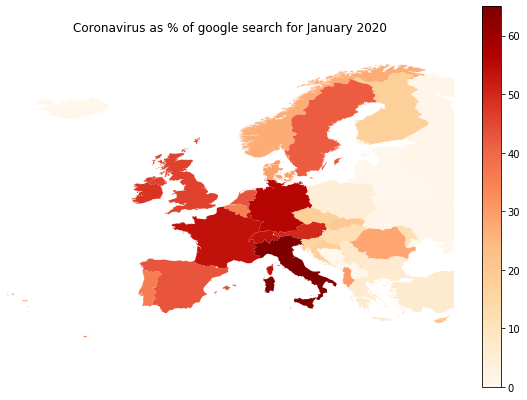

In [44]:
pd_search.plot(figsize=(10, 7), column='search', cmap='OrRd', legend=True);
plt.xlim(-28, 35)
plt.ylim(30, 75) 
plt.title('Coronavirus as % of google search for January 2020')
plt.axis('off')
plt.savefig("europe_coronavirus_search.png", dpi=200)